# Worksheet 5

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Task 2: Loading and Preprocessing Image Data in keras:

In [37]:
train_dir = "/content/drive/MyDrive/AI & ML Datasets/FruitinAmazon/train"  # Change this to your actual dataset path
test_dir = "/content/drive/MyDrive/AI & ML Datasets/FruitinAmazon/test"
classes = os.listdir(train_dir)  # Get list of class directories

In [38]:
# Print the number of images in each class
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class {class_name}: {num_images} images")

Class acai: 15 images
Class guarana: 15 images
Class cupuacu: 15 images
Class graviola: 15 images
Class pupunha: 15 images
Class tucuma: 15 images


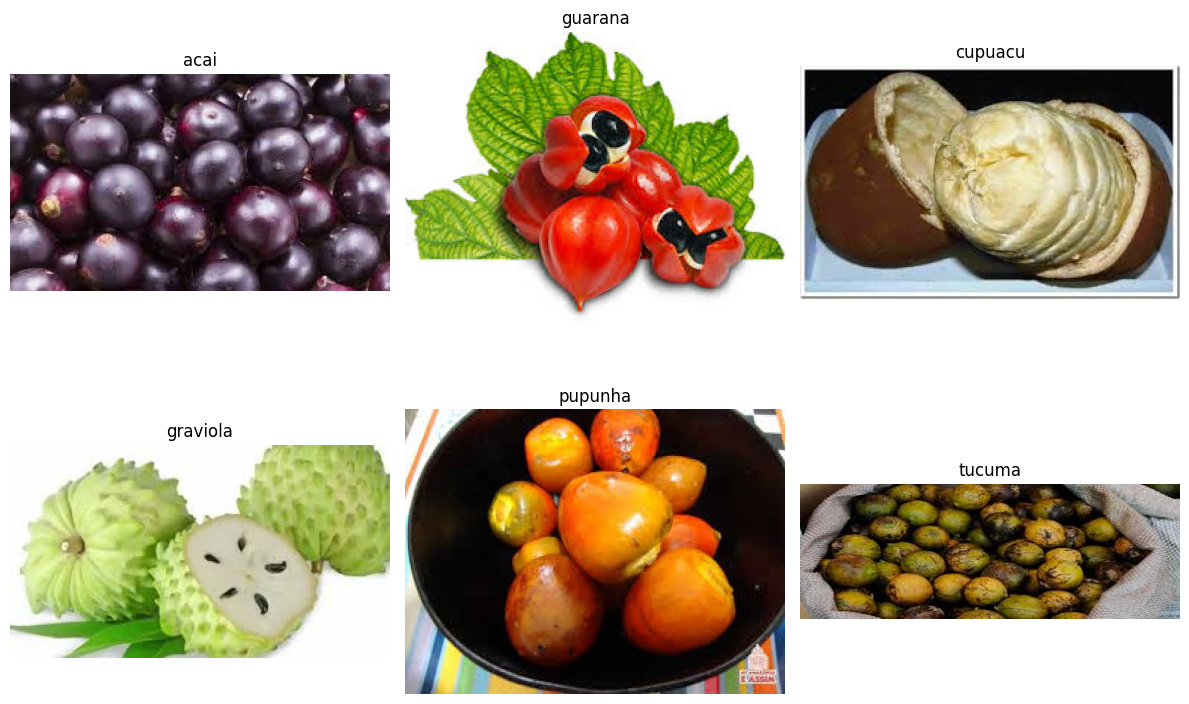

In [39]:
import random
# Visualize a random sample image from each of the first 6 classes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

for i, class_name in enumerate(classes[:6]):  # Show 6 sample images
    class_path = os.path.join(train_dir, class_name)
    sample_image = random.choice(os.listdir(class_path))  # Pick a random image
    img = Image.open(os.path.join(class_path, sample_image))

    # Calculate row and column indices
    row = i // 3
    col = i % 3

    axes[row, col].imshow(img)
    axes[row, col].set_title(class_name)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

# Check for Corrupted Image:

In [40]:
import os
import shutil
from PIL import Image



# Initialize a list to keep track of corrupted images
corrupted_images = []

# Iterate through each class subdirectory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    # Ensure it is a directory
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                # Attempt to open the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify that it is a valid image
            except (IOError, SyntaxError) as e:
                # If the image is corrupted, remove it
                os.remove(image_path)
                corrupted_images.append(image_path)
                print(f"Removed corrupted image: {image_path}")

# Print the final message
if not corrupted_images:
    print("No corrupted images found.")

No corrupted images found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [41]:
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation

In [42]:
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]

In [43]:
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset="training",
seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [44]:
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

In [45]:
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset="validation",
seed=123
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [46]:
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

In [47]:
#  Create test dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False  # Important to keep test data in original order
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


# Task 3 - Implement a CNN
Follow the following Structure and Hyper - parameters:
Convolutional Architecture:

Convolutional Layer 1: Filter Size (F): (3, 3) Number of Filters (k): 32 Padding (P): same Stride (s): 1 Activation Layer: ReLU activation Pooling Layer 1: Max pooling Filter Size (F): (2, 2) Stride (s): 2 Convolutional Layer 2: Filter Size (F): (3, 3) Number of Filters (k): 32 Padding (P): same Stride (s): 1 Activation Layer: ReLU activation Pooling Layer 2: Max pooling Filter Size (F): (2, 2) Stride (s): 2 Fully Connected Network Architecture:

Flatten Layer: Flatten the input coming from the convolutional layers Input Layer: Hidden Layer - 2: Number of Neurons: 64 Number of Neurons: 128 Output Layer: Number of Neurons: num classes (number of output classes)

In [48]:
# Define the number of output classes
num_classes = 6  # Adjust this based on your dataset


# Define the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128,128, 3), padding="same"),
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Network
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])

#  Task 4: Compile the Model

**Model Compilation**

Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy), and evaluation metric (e.g., accuracy).


In [49]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

**Model Training**

Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs to 250.

Use val ds for validation.

Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid- ing overfitting.

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
# Train the model
history = model.fit(train_ds,
    validation_data=val_ds, epochs=200, batch_size=32, callbacks=[checkpoint, early_stopping] )

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.1250 - loss: 2.3545
Epoch 1: val_loss improved from inf to 2.04732, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 768ms/step - accuracy: 0.1250 - loss: 2.4180 - val_accuracy: 0.1667 - val_loss: 2.0473
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - accuracy: 0.2425 - loss: 1.8620
Epoch 2: val_loss improved from 2.04732 to 1.77323, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2270 - loss: 1.8726 - val_accuracy: 0.0556 - val_loss: 1.7732
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.4016 - loss: 1.7304
Epoch 3: val_loss did not improve from 1.77323
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 718ms/step - accuracy: 0.3915 - loss: 1.7286 - val_accuracy: 0.0000e+00 - val_loss: 1.8493
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.1742 - loss: 1.7278
Epoch 4: val_loss did not improve from 1.77323
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.1

In [52]:
val_loss, val_acc = model.evaluate(val_ds)
print(f'Validation Accuracy: {val_acc:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.0556 - loss: 1.7732
Validation Accuracy: 0.0556


In [53]:

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step - accuracy: 0.3333 - loss: 1.7444
Test Loss: 1.7444186210632324
Test Accuracy: 0.3333333432674408


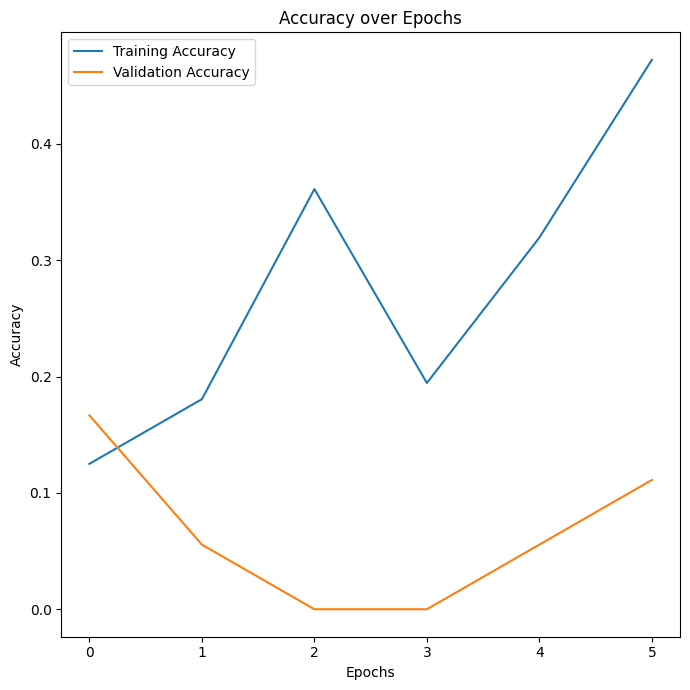

In [54]:
# Plot training and validation accuracy
plt.figure(figsize=(7, 7))
# Accuracy plot

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


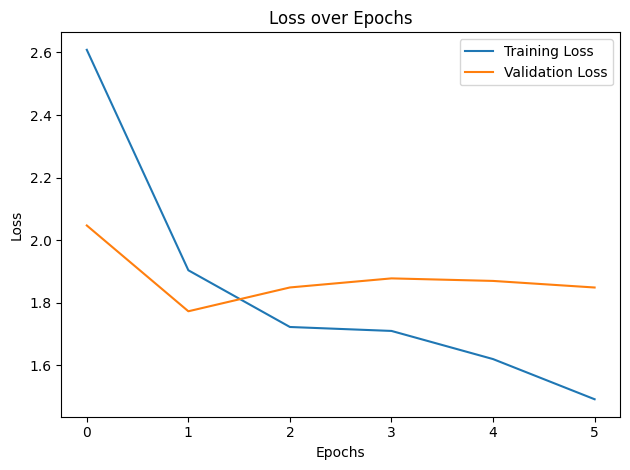

In [55]:

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Task 6: Save and Load the Model

Model Saving and Loading

Save the trained model to an .h5 file using model.save(). Load the saved model and re-evaluate its performance on the test set.

Saving Model

In [56]:

# Save the trained model to an .h5 file
model.save('fruit_model.h5')

In [57]:
# Load the saved model
loaded_model = tf.keras.models.load_model('fruit_model.h5')

# Re-evaluate the model on the test dataset
loss, accuracy = loaded_model.evaluate(test_ds)

print('Test Loss (Loaded Model):', loss)
print('Test Accuracy (Loaded Model):', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 1.7444
Test Loss (Loaded Model): 1.7444186210632324
Test Accuracy (Loaded Model): 0.3333333432674408


#  Task 7: Predictions and Classification Report


Making Predictions

Use model.predict() to make predictions on test images. Convert the model’s predicted probabilities to digit labels using np.argmax(). Also use from sklearn.metrics import classification report to report the Classification Report of your Model Performance.

In [59]:
from sklearn.metrics import classification_report

# Make predictions
predictions = model.predict(test_ds)

# Convert probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for images, labels in test_ds.unbatch():  # Unbatch the dataset to get individual labels
    true_labels.append(labels.numpy())  # Use append instead of extend

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.25      0.40      0.31         5
           2       0.22      0.40      0.29         5
           3       0.00      0.00      0.00         5
           4       0.67      0.80      0.73         5
           5       0.00      0.00      0.00         5

    accuracy                           0.33        30
   macro avg       0.24      0.33      0.28        30
weighted avg       0.24      0.33      0.28        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
